In [205]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# feature extraction
import biosppy.signals.ecg as ecg

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.feature_extraction as feature_extraction
import Components.Two_Step_Model as Two_Step_Model

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(feature_extraction)
importlib.reload(Two_Step_Model)



from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



### Data Input

In [192]:
X, y = data_fetching.get_train_data()

In [225]:
X_luke, y_luke = data_fetching.get_engineered_train_data()
print(np.shape(X_luke))
print(np.shape(y_luke))

(5117, 72)
(5117, 1)


### Feature Extraction

In [6]:
X_transf = feature_extraction.get_features(X=X,types=['heartbeats'], verbose=True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
4500
4600
4700
4800
4900
5000
5100
unsupported operand type(s) for -: 'str' and 'float'
5116


In [ ]:
# check pca: 
y_1 = y.copy()
y_1['y'] = np.where((y_1.y == 1), 0, y_1.y)
y_1['y'] = np.where((y_1.y == 2), 0, y_1.y)
print(y_1.hist())

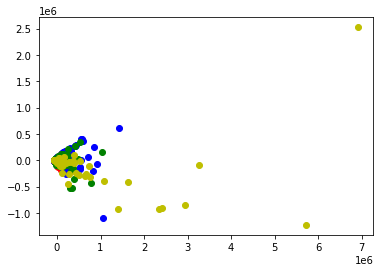

In [80]:
pca = PCA(n_components=2)
pca.fit(X_transf)
X_pca = pca.transform(X_transf)
X_pca = pd.DataFrame(X_pca)
idx_1 = np.where(y[:1500].y == 1)
idx_0 = np.where(y[:1500].y == 0)
idx_2 = np.where(y[:1500].y == 2)
idx_3 = np.where(y[:1500].y == 3)

class_0 = pd.DataFrame(X_pca.iloc[idx_0])
class_1 = pd.DataFrame(X_pca.iloc[idx_1])
class_2 = pd.DataFrame(X_pca.iloc[idx_2])
class_3 = pd.DataFrame(X_pca.iloc[idx_3])



#print(class_1[0])


plt.scatter(class_1[0], class_1[1], c='r')
plt.scatter(class_0[0], class_0[1], c='b')
plt.scatter(class_2[0], class_2[1], c='g')
plt.scatter(class_3[0], class_3[1], c='y')



plt.show()

[[<AxesSubplot:title={'center':'y'}>]]


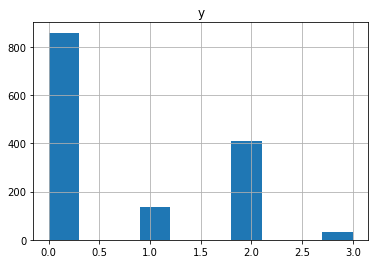

### Pipeline for Outlier Detection of Class 2

In [206]:
clf1 = SVC()
clf2 = SVC()
clf1_args = {'C':1.0, 'kernel': 'rbf', 'gamma': 'auto', 'shrinking':True, 'cache_size':1000, 'class_weight': 'balanced'}
clf2_args = {'C':1.0, 'kernel': 'rbf', 'gamma': 'auto', 'shrinking':True, 'cache_size':1000, 'class_weight': 'balanced'}

In [191]:
print(np.shape(y))

()


In [207]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  Two_Step_Model.TwoStepModel(clf1, clf2))
                ])

In [208]:
print(pipe['classification'])

TwoStepModel()


In [171]:
y = SVC
x = y()
print(x)

SVC()


In [196]:
m = Two_Step_Model.TwoStepModel(clf1, clf2,  verbose=False)
print(m.get_params())
l = SVC().fit(X_transf, y[0:5116])

{'clf1__C': 1.0, 'clf1__break_ties': False, 'clf1__cache_size': 1000, 'clf1__class_weight': 'balanced', 'clf1__coef0': 0.0, 'clf1__decision_function_shape': 'ovr', 'clf1__degree': 3, 'clf1__gamma': 'auto', 'clf1__kernel': 'rbf', 'clf1__max_iter': -1, 'clf1__probability': False, 'clf1__random_state': None, 'clf1__shrinking': True, 'clf1__tol': 0.001, 'clf1__verbose': False, 'clf1': SVC(cache_size=1000, class_weight='balanced', gamma='auto'), 'clf2__C': 1.0, 'clf2__break_ties': False, 'clf2__cache_size': 1000, 'clf2__class_weight': 'balanced', 'clf2__coef0': 0.0, 'clf2__decision_function_shape': 'ovr', 'clf2__degree': 3, 'clf2__gamma': 'auto', 'clf2__kernel': 'rbf', 'clf2__max_iter': -1, 'clf2__probability': False, 'clf2__random_state': None, 'clf2__shrinking': True, 'clf2__tol': 0.001, 'clf2__verbose': False, 'clf2': SVC(cache_size=1000, class_weight='balanced', gamma='auto'), 'verbose': False}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [209]:
# fit the pipeline and evaluate

scores = cross_val_score(pipe, X_transf, y[0:5116], cv=2, scoring='f1_micro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.63995309 0.65949961]
Accuracy: 0.65 (+/- 0.02)


In [227]:
# do a grid search:
gamma_range = np.logspace(-5, -3, 2)
parameters = [{'classification__clf1' : [SVC(C=0.1, gamma=0.0001, class_weight='balanced'), 
               SVC(C=1.0, gamma=0.0001, class_weight='balanced'), SVC(C=5.0, gamma=0.0001, class_weight='balanced'),
               SVC(C=0.1, gamma=0.01, class_weight='balanced'), SVC(C=1.0, gamma=0.01, class_weight='balanced'),
               SVC(C=5.0, gamma=0.01, class_weight='balanced'),
                                        SVC(C=0.1, gamma=0.0001, class_weight=None), 
               SVC(C=1.0, gamma=0.0001, class_weight=None), SVC(C=5.0, gamma=0.0001, class_weight=None),
               SVC(C=0.1, gamma=0.01, class_weight=None), SVC(C=1.0, gamma=0.01, class_weight=None),
               SVC(C=5.0, gamma=0.01, class_weight=None)], 
              'classification__clf2': [SVC(C=0.1, gamma=0.0001, class_weight='balanced'), 
               SVC(C=1.0, gamma=0.0001, class_weight='balanced'), SVC(C=5.0, gamma=0.0001, class_weight='balanced'),
               SVC(C=0.1, gamma=0.01, class_weight='balanced'), SVC(C=1.0, gamma=0.01, class_weight='balanced'),
               SVC(C=5.0, gamma=0.01, class_weight='balanced'),
                                        SVC(C=0.1, gamma=0.0001, class_weight=None), 
               SVC(C=1.0, gamma=0.0001, class_weight=None), SVC(C=5.0, gamma=0.0001, class_weight=None),
               SVC(C=0.1, gamma=0.01, class_weight=None), SVC(C=1.0, gamma=0.01, class_weight=None),
               SVC(C=5.0, gamma=0.01, class_weight=None)]}]

clf = GridSearchCV(pipe, parameters,cv=10,n_jobs=16,scoring='f1_micro', verbose=10)

In [219]:
parameters2 = [{'classification__clf1' : [SVC(C=0.1, gamma='auto', class_weight=None), 
               SVC(C=1.0, gamma='auto', class_weight=None), SVC(C=5.0, gamma='auto', class_weight=None)], 
              'classification__clf2': [SVC(C=0.1, gamma='auto', class_weight=None), 
               SVC(C=1.0, gamma='auto', class_weight=None), SVC(C=5.0, gamma='auto', class_weight=None)]}]

In [228]:
# View The Best Parameters
#last on got an error
clf.fit(X_luke, y_luke)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   13.1s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   24.0s
[Parallel(n_jobs=16)]: Done  29 tasks      | elapsed:   24.6s
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   34.9s
[Parallel(n_jobs=16)]: Done  53 tasks      | elapsed:   44.8s
[Parallel(n_jobs=16)]: Done  66 tasks      | elapsed:   53.6s
[Parallel(n_jobs=16)]: Done  81 tasks      | elapsed:  1.0min
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:  1.1min
[Parallel(n_jobs=16)]: Done 113 tasks      | elapsed:  1.4min
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.5min
[Parallel(n_jobs=16)]: Done 149 tasks      | elapsed:  1.7min
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  1.9min
[Parallel(n_jobs=16)]: Done 189 tasks      | elapsed:  2.0min
[Parallel(n_jobs=16)]: Done 210 tasks      | elapsed:  2.3min
[Parallel(n_jobs=16)]: Done 233 tasks      | elapsed:  

{'classification__clf1': SVC(C=0.1, gamma=0.0001), 'classification__clf2': SVC(C=5.0, gamma=0.01)}
0.6754024737035225


In [229]:
results = pd.DataFrame(clf.cv_results_)
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth",200) 
results[["params","mean_test_score"]] #.query('mean_test_score >= 0.69')

,params,mean_test_score
0,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=0.1, class_weight='balanced', gamma=0.0001)}",0.443021
1,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(class_weight='balanced', gamma=0.0001)}",0.517505
2,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=5.0, class_weight='balanced', gamma=0.0001)}",0.513590
3,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=0.1, class_weight='balanced', gamma=0.01)}",0.515346
4,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(class_weight='balanced', gamma=0.01)}",0.537820
5,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=5.0, class_weight='balanced', gamma=0.01)}",0.550134
6,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.0001)}",0.519259
7,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(gamma=0.0001)}",0.520431
8,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=5.0, gamma=0.0001)}",0.521212
9,"{'classification__clf1': SVC(C=0.1, class_weight='balanced', gamma=0.0001), 'classification__clf2': SVC(C=0.1, gamma=0.01)}",0.528053
